# Linear Regression Machine Learning Project for Bug Prediction

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Importing Data and Checking out.

In [2]:
BugsDF = pd.read_csv('train-data.csv')

In [3]:
data = BugsDF

In [4]:
BugsDF.head()

,RELEASE,NFILES,ALOC,DLOC,STAGE,BUGS
0,2.19,0,0,0,Design,0.0
1,2.19,7583,9632,8946,Development,53.0
2,2.19,0,0,0,Testing,51.0
3,2.19,0,0,0,Audit,0.0
4,2.19,7583,9632,8946,Production,113.0


In [5]:
BugsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RELEASE  55 non-null     float64
 1   NFILES   55 non-null     int64  
 2   ALOC     55 non-null     int64  
 3   DLOC     55 non-null     int64  
 4   STAGE    55 non-null     object 
 5   BUGS     40 non-null     float64
dtypes: float64(2), int64(3), object(1)
memory usage: 2.7+ KB


In [6]:
BugsDF.describe()

,RELEASE,NFILES,ALOC,DLOC,BUGS
count,55.000000,5.500000e+01,5.500000e+01,5.500000e+01,40.00000
mean,2.240000,1.230171e+09,1.646837e+09,1.471031e+09,56.05000
std,0.031914,5.271258e+09,7.059095e+09,6.305789e+09,173.17872
min,2.190000,0.000000e+00,0.000000e+00,0.000000e+00,0.00000
25%,2.210000,0.000000e+00,0.000000e+00,0.000000e+00,0.00000
50%,2.240000,1.000000e+00,1.000000e+02,0.000000e+00,0.00000
75%,2.270000,8.125800e+04,1.045420e+05,9.643950e+04,25.00000
max,2.290000,2.764946e+10,3.702840e+10,3.307773e+10,910.00000


In [7]:
BugsDF.columns

Index(['RELEASE', 'NFILES', 'ALOC', 'DLOC', 'STAGE', 'BUGS'], dtype='object')

In [8]:
BugsDF.shape

(55, 6)

In [9]:
test_df = BugsDF[BugsDF["BUGS"].isnull()]

In [10]:
test_df.shape

(15, 6)

In [11]:
BugsDF = BugsDF.dropna()

In [12]:
BugsDF.shape

(40, 6)

## Exploratory Data Analysis for Bug Prediction

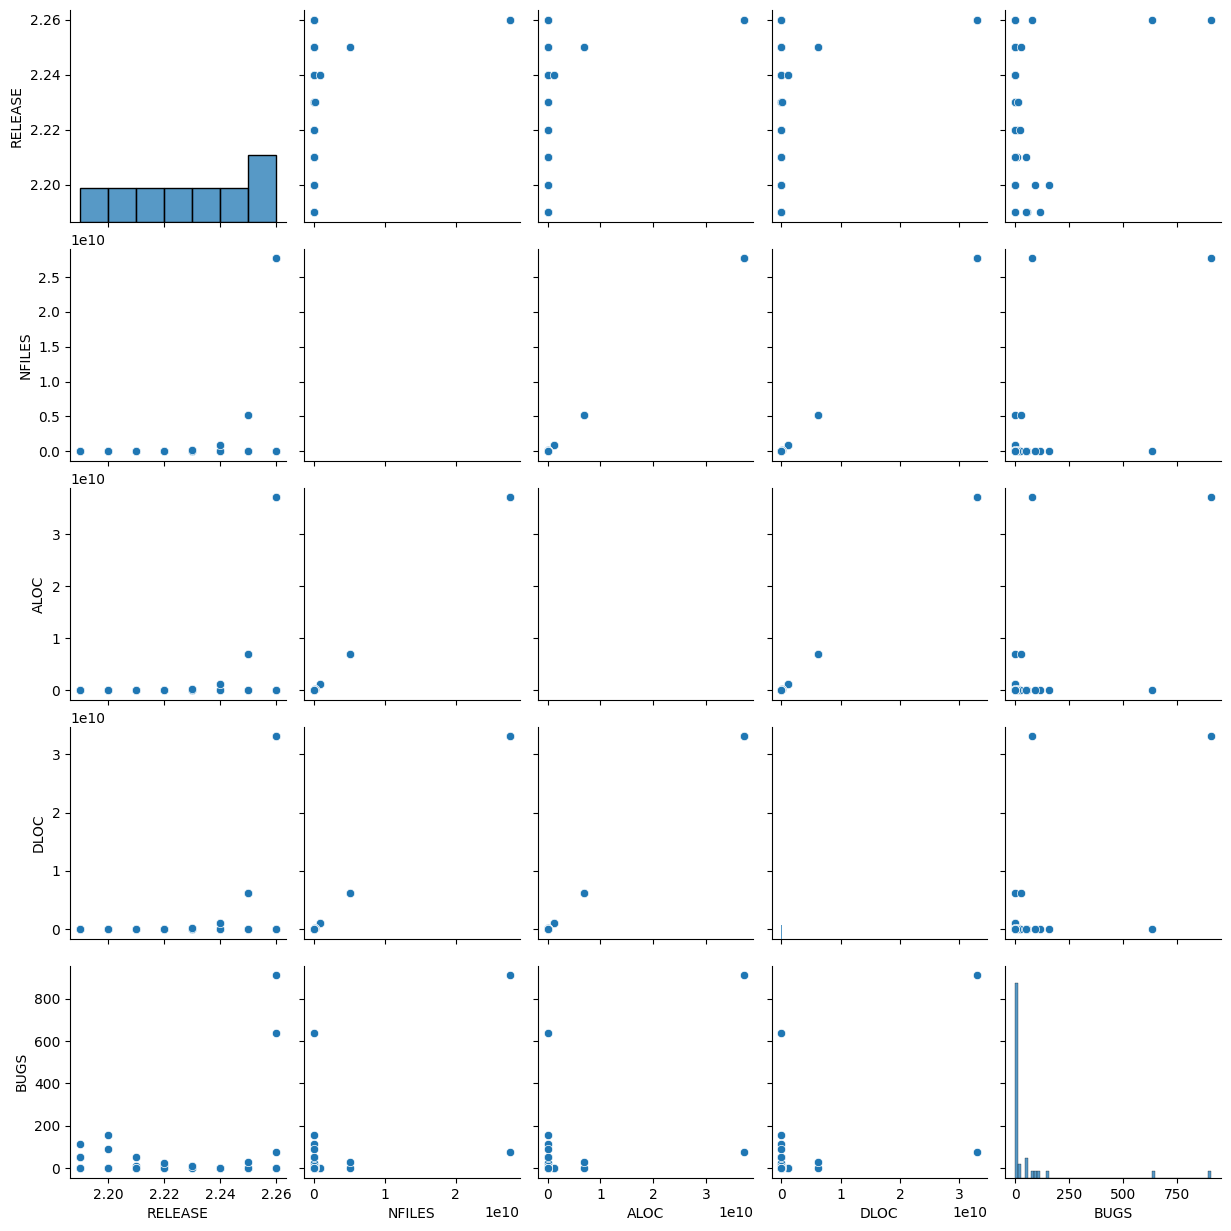

In [13]:
sns.pairplot(BugsDF)

<AxesSubplot: xlabel='BUGS', ylabel='Density'>

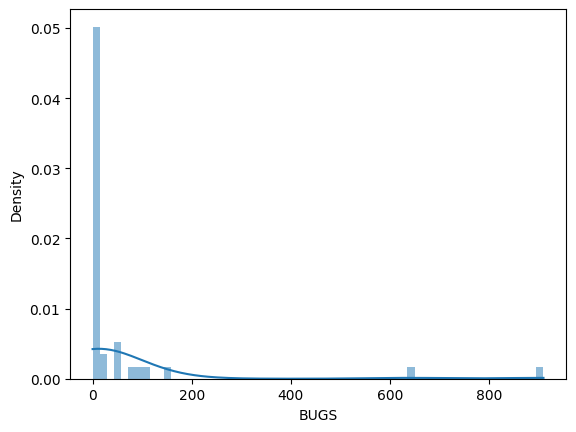

In [14]:
sns.histplot(BugsDF['BUGS'], kde=True, stat="density", linewidth=0)

C:\Users\askumarsingh\AppData\Local\Temp\ipykernel_33816\871371822.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(BugsDF.corr(), annot=True)


<AxesSubplot: >

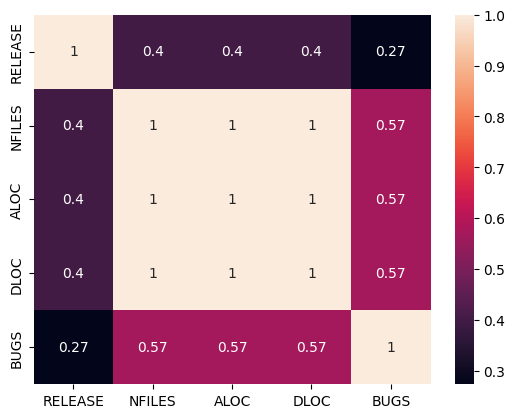

In [17]:
sns.heatmap(BugsDF.corr(), annot=True)

## Training a Linear Regression Model

### X and y List

In [18]:
X = BugsDF[['RELEASE','NFILES', 'ALOC', 'DLOC',
               'STAGE']]

y = BugsDF['BUGS']

In [19]:
X['STAGE']=X['STAGE'].astype('category').cat.codes

C:\Users\askumarsingh\AppData\Local\Temp\ipykernel_33816\1695972842.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['STAGE']=X['STAGE'].astype('category').cat.codes


In [37]:
y_train = BugsDF['BUGS']

In [38]:
y_test = test_df['BUGS']

In [39]:
X_train = BugsDF.drop('BUGS', axis=1)

In [40]:
X_train['STAGE']=X_train['STAGE'].astype('category').cat.codes

In [41]:
X_test = test_df.drop('BUGS', axis=1)

In [42]:
X_test['STAGE']=X_test['STAGE'].astype('category').cat.codes

## Creating and Training the LinearRegression Model

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
lm = LinearRegression()

In [45]:
lm.fit(X_train,y_train)

LinearRegression()

## LinearRegression Model Evaluation

In [46]:
print(lm.intercept_)

-2327.393974676097


In [47]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
RELEASE,1038.733871
NFILES,-0.000025
ALOC,0.000023
DLOC,-0.000005
STAGE,31.594444


## Predictions from our Linear Regression Model

In [57]:
predictions = lm.predict(X_test)

In [62]:
predictions.shape

(15,)

In [63]:
predictions

array([ 62.12635661,  93.73657682, 156.91309927,  30.53395892,
       125.3172339 ,  72.51596442, 104.19087158, 167.31822663,
        40.92152028, 135.78515316,  82.90542302, 114.64857604,
       177.6905019 ,  51.30658989, 146.24062969])

In [68]:
test_df.loc[test_df.BUGS.isnull(), 'BUGS'] = predictions

C:\Users\askumarsingh\AppData\Local\Temp\ipykernel_33816\1367813522.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.loc[test_df.BUGS.isnull(), 'BUGS'] = predictions


In [69]:
test_df.shape

(15, 6)

In [70]:
test_df

,RELEASE,NFILES,ALOC,DLOC,STAGE,BUGS
40,2.27,0,0,0,Design,62.126357
41,2.27,75,963,894,Development,93.736577
42,2.27,100,300,200,Testing,156.913099
43,2.27,10,100,0,Audit,30.533959
44,2.27,7,96,8,Production,125.317234
45,2.28,1,100,0,Design,72.515964
46,2.28,27,3708,332,Development,104.190872
47,2.28,30,1000,200,Testing,167.318227
48,2.28,1,100,0,Audit,40.921520
49,2.28,27,3702,337,Production,135.785153
